In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Вообще для распознования изображений, хорошо себя показали сверточные НС, но мы пока используем обучную полносвязную НС**

Загрузка обучающей и тестовой выборок

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#x_train - это изображение (например на изображении написана 5)
#y_train - вектор соответсвующий значений цифр - 5
#каждое изображение это: 28*28 пикселей размер в градациях серого (0-черный цвет, 255- белый)
#60000 - в обучающей выборки и 10000 в тестовой

11490434/11490434 [==============================] - 2s 0us/step


Нормализация входных данных

Стандартизировали значения, так чтобы принимали формат вещественный и от 0 до 1

In [3]:
x_train = x_train / 255
x_test = x_test / 255

Преобразование выходных значений в векторы по категориям

Преобразовали числа в виде векторов.

Например:

0 >>>>>> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

3 >>>>>> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [7]:
y_train_cat = keras.utils.to_categorical(y_train, 10) #10 - длина вектора
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 25 изображений из выборки

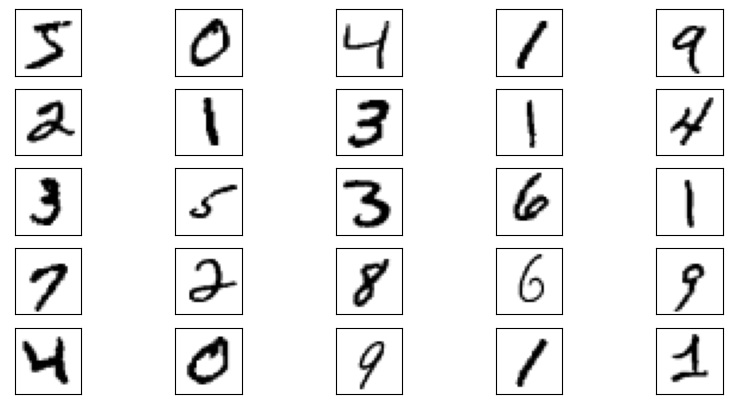

In [5]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
plt.show()

**Опишим модель нашей НС:**
 
-На первом слое 784 входа (потому что изображение 28 * 28 пиксилей, 28*28=784)

-И + еще один вход (bias) - смещение 

-Скрытый слой - 128 нейронов 

-Выходной слой (10 нейроном, потому что мы должны получить 10 цифр- от 0 до 9)

-Функция активации для скрытого слоя - ReLu

-Функция активации для выходного слоя - Softmax (потому что хотим получить выходные значения в виде вероятности)

**Работа НС:**

Первый слой должен преобразовывать изображение размером 28*28 пикселей в вектор состоящий из 784 значений

___________________________________________________________________________________________________________________________

Формирование модели НС и вывод ее структуры в консоль

In [6]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), #подача на вход изображения 28*28 пикселей. 1байт в градации серого.
    Dense(128, activation='relu'), #внутренний слой из 128 нейронов и функцией акивации relu
    Dense(10, activation='softmax') #выходной слой из 10 нейронов и функцией активации softmax
])

print(model.summary())  #вывод структуры НС в консоль

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


 Param # - это веса настраиваемые в ходе обучения
 
 Для входного слоя - 0
 
 Для внутреннего слоя - 100480: (784(число входов входного слоя) + 1 (bias) = 785 * 128(нейронов внутреннего слоя) = 100480 (число весовых коэффициентом)
 
 Для выходного слоя - 1290: 128 нейронов внутреннего слоя + 1 (bias) * 10 = 1290
 
 

Компиляция НС с оптимизацией по Adam и критериям - категориальная кросс-энтропия

In [9]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy', #наилучший вариант для задач классификации
            metrics=['accuracy']) #нам важно получить большой % точности распознания (правильно распознает 99/100 цифр) - пример

Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидация

In [10]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
#x_train - картинки с цифрами
#y_train_cat - ответы к каждой картинрки (но уже в виде вектора - [1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
#batch_size=32 - бач, после каждой 32 картинки будет происходит корректировка весов 
#epochs=5 - 5 эпох, 5 раз все картинки пройду по кругу для обучения 
#validation_split=0.2 соотношения разбиения выборки на тренировочную и валидационную(проверочную)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2886 - accuracy: 0.9169 - val_loss: 0.1523 - val_accuracy: 0.9578
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1296 - accuracy: 0.9620 - val_loss: 0.1196 - val_accuracy: 0.9650
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0895 - accuracy: 0.9735 - val_loss: 0.1036 - val_accuracy: 0.9687
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0659 - accuracy: 0.9805 - val_loss: 0.0922 - val_accuracy: 0.9735
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0967 - val_accuracy: 0.9712


Проверка на тестовой выборки

In [11]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0847 - accuracy: 0.9736


[0.08474991470575333, 0.9735999703407288]

Получаем:

-Критерий качества:  0.0847

-Точность распознавания: 0.9736

Проверка распознования цифр

1/1 [==============================] - 0s 19ms/step
[[2.2319374e-07 3.6662200e-07 3.6172685e-05 2.8829824e-04 9.7243449e-11
  4.1299963e-08 2.2563802e-11 9.9967098e-01 1.0816392e-06 2.9714556e-06]]
Распознаная цифра: 7


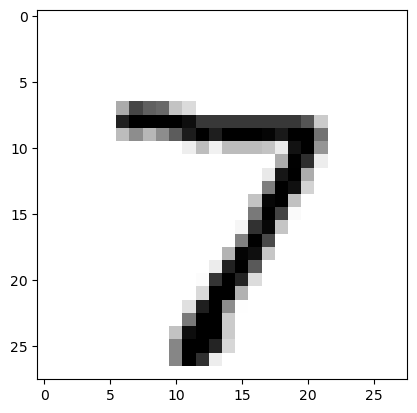

In [14]:
n = 0 #индекс изображения (подадим первое изображение)
x=np.expand_dims(x_test[n], axis=0) #создаем трехмерный тензор. выбираем изображение и добавлем еще одну ось (axis=0)
res = model.predict(x) #подаем изображение на вход модели
print( res ) #отображаем 10 выходом НС
print( f"Распознаная цифра: {np.argmax(res)}" ) #с помощью (argmax) берем индекс максимальнорго значения среди 10 выходов НС

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

 9.9967098e-01 - это 7 индекс, наибольший среди всех.

____________________________________________________________________________________________________________________________

Распознавание всей тестовой выбори

In [15]:
pred = model.predict(x_test) #пропустим через НС всю тестовую выборку
pred = np.argmax(pred, axis=1) #выделяем одно макисмальное значение при предсказывании

print(pred.shape)

print(pred[:20]) #посмотрим первые 20 значений (то что предсказала НС)
print(y_test[:20]) #посмотрим первые 20 значений (то что должно быть на самом деле)

313/313 [==============================] - 0s 1ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


На первых 20 значений ошибок нет

Выделение неверных вариантов

In [16]:
mask = pred == y_test #создадим маску, которая будет сравнивать значения предсказанные и реальные и возвращать True или False
print(mask[:10])

x_false = x_test[~mask] # значек тильда (~) делает инверсию маски и будет возвращать значения True  (которое теперь стали False из-за инверсии)
p_false = pred[~mask] #и будет возвращать их значения

print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(264, 28, 28)


Получаем, что 264 изображения из 10000 были неверно распознаны

Вывод первых 5 неверных результатов

Значение сети: 9


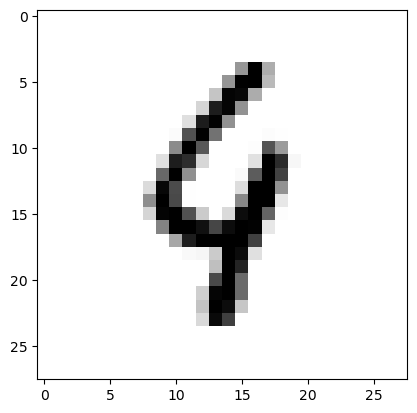

Значение сети: 6


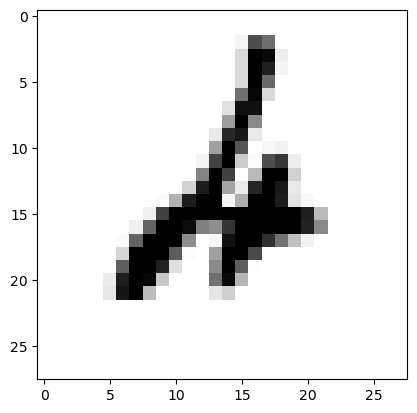

Значение сети: 1


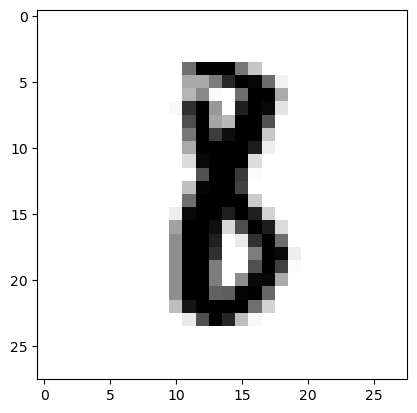

Значение сети: 7


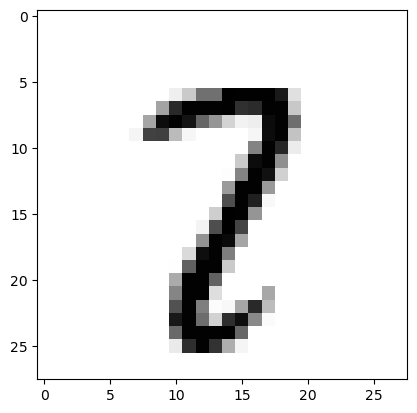

Значение сети: 3


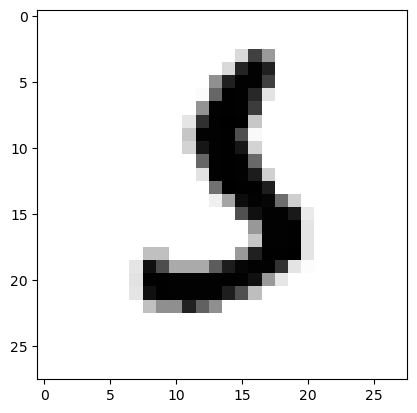

In [18]:
for i in range(5):
    print("Значение сети: "+ str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()